# Classification de points avec une ODE-Net (Torch)

Pour cet exemple, nous avons comme data-set une sphère de points dont la classe est -1 et une couronne autour de cette sphère dont la classe est +1. Le but est donc ici d'entrainer un ODE-Net afin qu'il puisse classer ces points correctement en utilisant la Cross Entropy Loss.

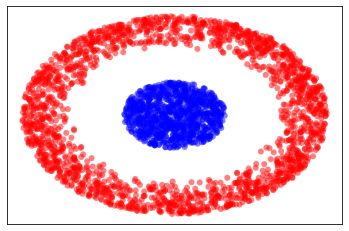

In [19]:
from dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                num_points_inner=1000, num_points_outer=2000)

dataloader = DataLoader(data_concentric, batch_size=3000, shuffle=True)
for inputs, targets in dataloader:
    alpha = 0.5
    color = ['red' if targets[i, 0] > 0.0 else 'blue' for i in range(len(targets))]
    num_dims = inputs.shape[1]
    plt.scatter(inputs[:, 0].numpy(), inputs[:, 1].numpy(), c=color,
                    alpha=alpha, linewidths=0)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False,
                        labelleft=False)

plt.show()

Une fois le data-set de training créé, nous pouvons entrainer un ODE-Net avec celui-ci. Cet Ode-Net contiendra trois couches, les couches d'entrée et de sortie ainsi qu'une hidden layer de taille 32 utilisant ReLu comme fonction d'activation. La méthode utilisée pour le backward sera la méthode adjointe.

In [20]:
import torch
from torch import tensor
import numpy as np
from plots import single_feature_plt
from anode.models import ODENet
from anode.training import Trainer
from plots import get_feature_history
from plots import multi_feature_plt

device = torch.device('cpu')

hidden_dim = 32
model = ODENet(device, data_dim, hidden_dim, time_dependent=True,
            non_linearity='relu', adjoint=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
trainer = Trainer(model, optimizer, device)
num_epochs = 12

dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)


for inputs, targets in dataloader_viz:
    feature_history = get_feature_history(trainer, dataloader, inputs,targets, num_epochs)
    break


Iteration 0/47
Loss: 0.591
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 10/47
Loss: 0.657
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 20/47
Loss: 0.498
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 30/47
Loss: 0.384
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.449
NFE: 20
BNFE: 20
Total NFE: 40
Epoch 1: 0.502

Iteration 0/47
Loss: 0.426
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 10/47
Loss: 0.419
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 20/47
Loss: 0.384
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 30/47
Loss: 0.396
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.299
NFE: 20
BNFE: 26
Total NFE: 46
Epoch 1: 0.365

Iteration 0/47
Loss: 0.371
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 10/47
Loss: 0.254
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 20/47
Loss: 0.321
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 30/47
Loss: 0.282
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.273
NFE: 20
BNFE: 20
Total NFE: 40
Epoch 1: 0.273

Iteration 0/47
Loss: 0.231
NFE: 20
BNFE: 20
Total NFE: 40

Une fois le modèle entrainé, il nous est alors possible de visualiser l'écolution des points durant le training ainsi que l'évolution de la loss:

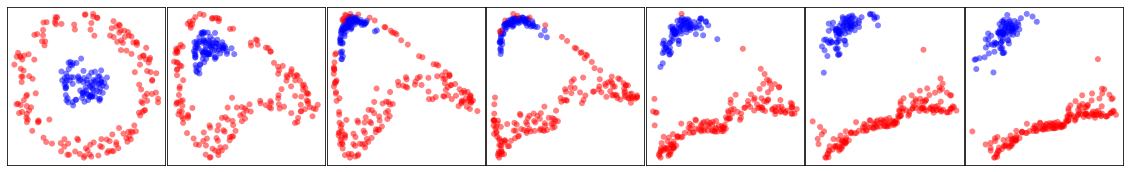

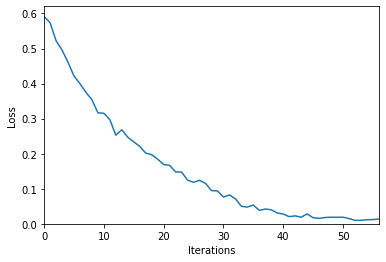

In [21]:
multi_feature_plt(feature_history[::2], targets)

# Affiche l'évolution de la loss durant le training
plt.plot(trainer.histories['loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Il est également possible d'afficher les prédictions par zone grâce à une fonction dans viz:

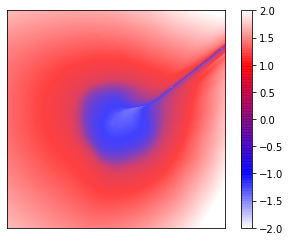

In [22]:
from viz.plots import input_space_plt

input_space_plt(model)

Testons maintenant le modèle sur de nouveaux points afin de voir comment il se comporte.

In [33]:
data_concentric_test = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                num_points_inner=256, num_points_outer=256)
dataloader_test = DataLoader(data_concentric_test, batch_size=512, shuffle=True)

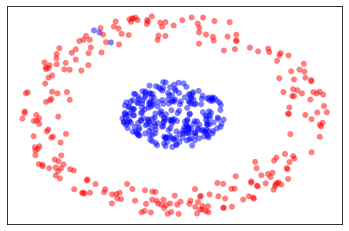

In [34]:
for inputs, targets in dataloader_test:
    preds = model(inputs)
    alpha = 0.5
    color = ['red' if preds[i, 0] > 0.0 else 'blue' for i in range(len(preds))]
    num_dims = inputs.shape[1]
    plt.scatter(inputs[:, 0].numpy(), inputs[:, 1].numpy(), c=color,
                    alpha=alpha, linewidths=0)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False,
                        labelleft=False)
    plt.show()
    break

## Carrés

Nous pouvons faire le même processus mais avec des carrés au lieu de cercle et sphères

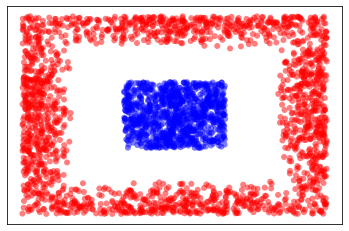

In [36]:
from dataloaders import ConcentricSquares

data_dim = 2
data_concentric = ConcentricSquares(inner_range=(0., .5), outer_range=(1., 1.5), 
                                    num_points_inner=1000, num_points_outer=2000)

dataloader = DataLoader(data_concentric, batch_size=3000, shuffle=True)
for inputs, targets in dataloader:
    alpha = 0.5
    color = ['red' if targets[i, 0] > 0.0 else 'blue' for i in range(len(targets))]
    num_dims = inputs.shape[1]
    plt.scatter(inputs[:, 0].numpy(), inputs[:, 1].numpy(), c=color,
                    alpha=alpha, linewidths=0)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False,
                        labelleft=False)

plt.show()

In [37]:
model = ODENet(device, data_dim, hidden_dim, time_dependent=True,
            non_linearity='relu', adjoint=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
trainer = Trainer(model, optimizer, device)
num_epochs = 12

dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)


for inputs, targets in dataloader_viz:
    feature_history = get_feature_history(trainer, dataloader, inputs,targets, num_epochs)
    break


Iteration 0/47
Loss: 0.676
NFE: 14
BNFE: 20
Total NFE: 34

Iteration 10/47
Loss: 0.554
NFE: 14
BNFE: 20
Total NFE: 34

Iteration 20/47
Loss: 0.555
NFE: 14
BNFE: 20
Total NFE: 34

Iteration 30/47
Loss: 0.520
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.501
NFE: 14
BNFE: 20
Total NFE: 34
Epoch 1: 0.556

Iteration 0/47
Loss: 0.342
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 10/47
Loss: 0.475
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 20/47
Loss: 0.450
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 30/47
Loss: 0.422
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.302
NFE: 20
BNFE: 20
Total NFE: 40
Epoch 1: 0.400

Iteration 0/47
Loss: 0.392
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 10/47
Loss: 0.312
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 20/47
Loss: 0.252
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 30/47
Loss: 0.283
NFE: 20
BNFE: 20
Total NFE: 40

Iteration 40/47
Loss: 0.269
NFE: 20
BNFE: 20
Total NFE: 40
Epoch 1: 0.299

Iteration 0/47
Loss: 0.263
NFE: 20
BNFE: 20
Total NFE: 40

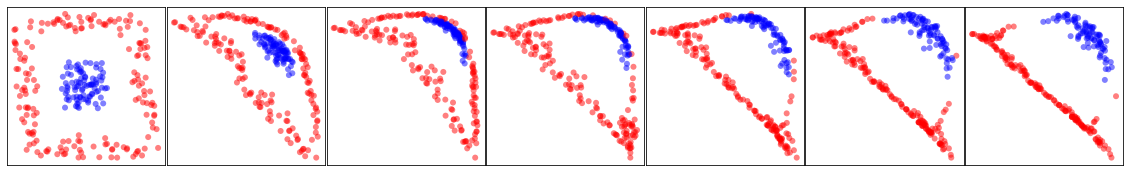

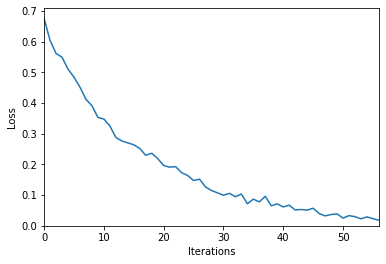

In [38]:
multi_feature_plt(feature_history[::2], targets)

# Affiche l'évolution de la loss durant le training
plt.plot(trainer.histories['loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

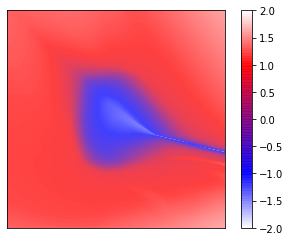

In [39]:
input_space_plt(model)

In [40]:
data_concentric_test = ConcentricSquares(inner_range=(0., .5), outer_range=(1., 1.5), 
                                num_points_inner=256, num_points_outer=256)
dataloader_test = DataLoader(data_concentric_test, batch_size=512, shuffle=True)

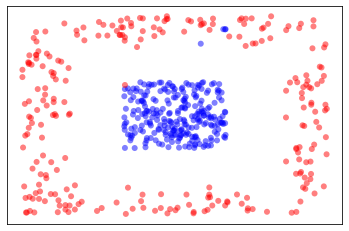

In [41]:
for inputs, targets in dataloader_test:
    preds = model(inputs)
    alpha = 0.5
    color = ['red' if preds[i, 0] > 0.0 else 'blue' for i in range(len(preds))]
    num_dims = inputs.shape[1]
    plt.scatter(inputs[:, 0].numpy(), inputs[:, 1].numpy(), c=color,
                    alpha=alpha, linewidths=0)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False,
                        labelleft=False)
    plt.show()
    break